In [1]:
pip install tensorflow

Note: you may need to restart the kernel to use updated packages.


In [3]:
import numpy as mp
import tensorflow as tf
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings(action='ignore')

In [4]:
mnist = tf.keras.datasets.mnist
(TrainX, TrainY), (TestX, TestY) = mnist.load_data()
TrainX.shape

(60000, 28, 28)

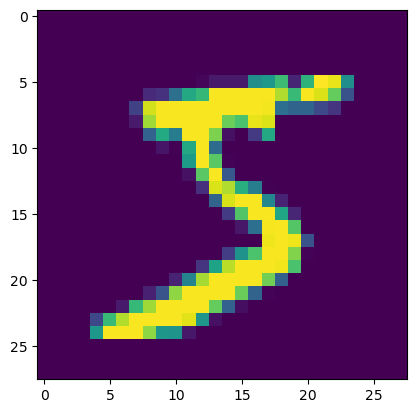

In [5]:
image_0 = TrainX[0]
plt.imshow(image_0)
plt.show()

In [6]:
for list_1_dimension in image_0:
    for element in list_1_dimension:
        print(str(element).rjust(3), end='')
    print('')

  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  3 18 18 18126136175 26166255247127  0  0  0  0
  0  0  0  0  0  0  0  0 30 36 94154170253253253253253225172253242195 64  0  0  0  0
  0  0  0  0  0  0  0 49238253253253253253253253253251 93 82 82 56 39  0  0  0  0  0
  0  0  0  0  0  0  0 18219253253253253253198182247241  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0 80156107253253205 11  0 43154  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0 14  1154253 90  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0139253190  2  0  0  0  0  0  0  

In [7]:
TrainX, TestX = TrainX / 255.0, TestX / 255.0

In [8]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28)),
    tf.keras.layers.Dense(128, activation='sigmoid'),
    tf.keras.layers.Dense(10, activation='softmax')
])

model.compile(optimizer='adam',
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten (Flatten)                    │ (None, 784)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │         100,480 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 101,770 (397.54 KB)

 Trainable params: 101,770 (397.54 KB)

 Non-trainable params: 0 (0.00 B)

In [9]:
model.fit(TrainX, TrainY, epochs=10)

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.8400 - loss: 0.6488
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9414 - loss: 0.2052
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9580 - loss: 0.1439
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9673 - loss: 0.1151
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9744 - loss: 0.0910
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9806 - loss: 0.0714
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9841 - loss: 0.0580
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9863 - loss: 0.0496
Epoch 9/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9890 - loss: 0.0423
Epoch 10/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.9908 - loss: 0.0365


In [14]:
loss, accuracy = model.evaluate(TestX, TestY, verbose=3)
print('loss값 :', loss)
print('모델 정확도 : ',round(accuracy*100, 3), '%')

loss값 : 0.0787724107503891
모델 정확도 :  97.57 %


.

In [19]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt

In [21]:
import ssl
ssl._create_default_https_context = ssl._create_unverified_context

(x_train, t_train), (x_test, t_test) = cifar10.load_data()
print('x_train :', np.shape(x_train))
print('t_train :', np.shape(t_train))
print('x_test :', np.shape(x_test))
print('t_test :', np.shape(t_test))


x_train : (50000, 32, 32, 3)
t_train : (50000, 1)
x_test : (10000, 32, 32, 3)
t_test : (10000, 1)


In [25]:
print('x_train 1번째 이미지 shape : ', x_train[0].shape)
x_train[0]

x_train 1번째 이미지 shape :  (32, 32, 3)


array([[[ 59,  62,  63],
        [ 43,  46,  45],
        [ 50,  48,  43],
        ...,
        [158, 132, 108],
        [152, 125, 102],
        [148, 124, 103]],

       [[ 16,  20,  20],
        [  0,   0,   0],
        [ 18,   8,   0],
        ...,
        [123,  88,  55],
        [119,  83,  50],
        [122,  87,  57]],

       [[ 25,  24,  21],
        [ 16,   7,   0],
        [ 49,  27,   8],
        ...,
        [118,  84,  50],
        [120,  84,  50],
        [109,  73,  42]],

       ...,

       [[208, 170,  96],
        [201, 153,  34],
        [198, 161,  26],
        ...,
        [160, 133,  70],
        [ 56,  31,   7],
        [ 53,  34,  20]],

       [[180, 139,  96],
        [173, 123,  42],
        [186, 144,  30],
        ...,
        [184, 148,  94],
        [ 97,  62,  34],
        [ 83,  53,  34]],

       [[177, 144, 116],
        [168, 129,  94],
        [179, 142,  87],
        ...,
        [216, 184, 140],
        [151, 118,  84],
        [123,  92,  72]]

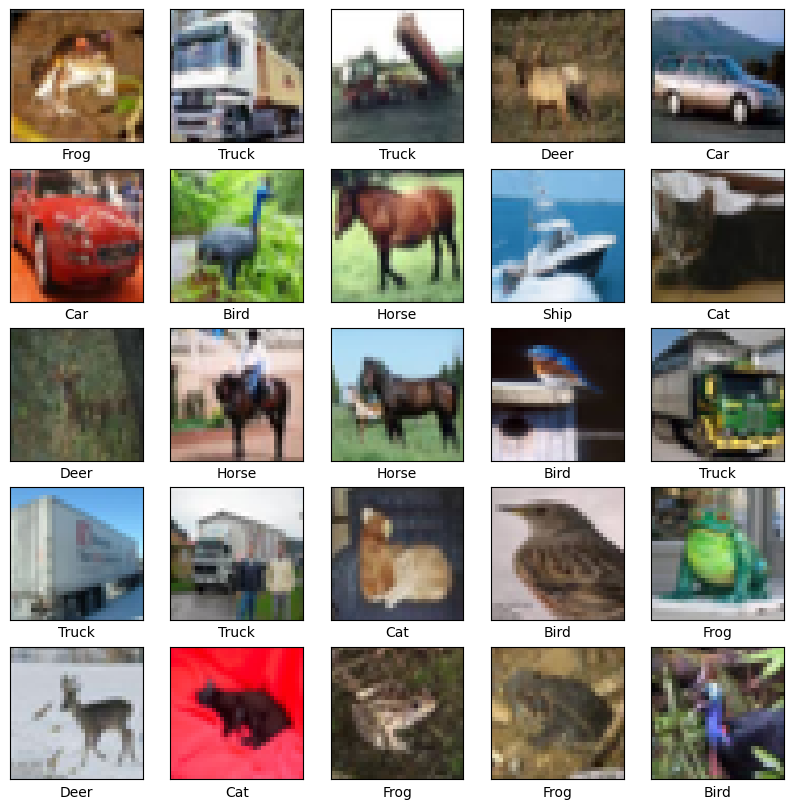

In [27]:
label_names = ['Airplane', 'Car', 'Bird', 'Cat', 'Deer', 'Dog', 'Frog', 'Horse', 'Ship', 'Truck']

plt.figure(figsize=(10, 10))

for i in range(25):
    plt.subplot(5, 5, i+1)  
    plt.xticks([])  
    plt.yticks([]) 
    plt.imshow(x_train[i])  
    plt.xlabel(label_names[t_train[i][0]]) 

plt.show() 

In [29]:
(x_train, t_train), (x_test, t_test) = cifar10.load_data()
print('x_train : ', np.shape(x_train))
print('t_train : ', np.shape(t_train))
print('x_test : ', np.shape(x_test))
print('t_test : ', np.shape(t_test))

x_train :  (50000, 32, 32, 3)
t_train :  (50000, 1)
x_test :  (10000, 32, 32, 3)
t_test :  (10000, 1)


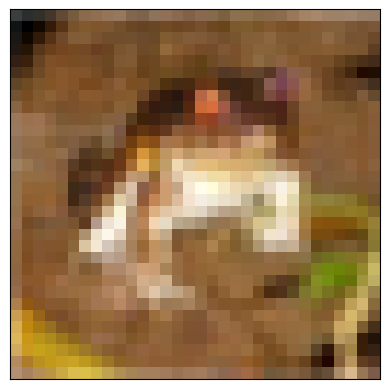

In [31]:
image_0 = x_train[0]
plt.xticks([])
plt.yticks([])
plt.imshow(image_0, cmap='gray')
plt.show()

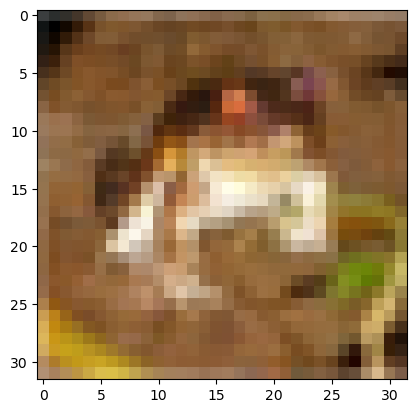

In [33]:
plt.imshow(x_train[0])
plt.show()

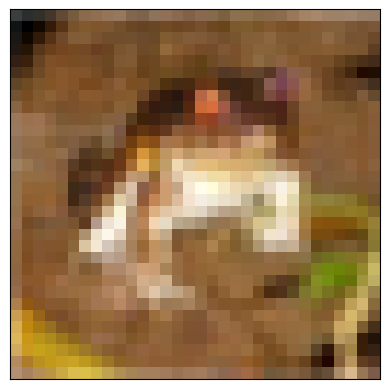

In [35]:
plt.xticks([])
plt.yticks([])
plt.imshow(x_train[0])
plt.show()

In [37]:
t_train

array([[6],
       [9],
       [9],
       ...,
       [9],
       [1],
       [1]], dtype=uint8)

In [39]:
for i in range(5):
    print(t_train[i])

[6]
[9]
[9]
[4]
[1]


In [41]:
for i in range(5):
    print(t_train[i][0])

6
9
9
4
1


In [45]:
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

t_train = to_categorical(t_train)
t_test = to_categorical(t_test)

print('One-hot Vector 적용 후 t_train shape :', t_train.shape)
print('One-hot Vector 적용 후 t_test shape :', t_test.shape)

One-hot Vector 적용 후 t_train shape : (50000, 10)
One-hot Vector 적용 후 t_test shape : (10000, 10)


In [47]:
width = 32
height = 32
channel = 3

model = Sequential(name='CIFAR10_CNN')
model.add(Conv2D(filters=32, kernel_size=(3,3), padding='same', activation='relu',
                 input_shape=(width, height, channel)))

model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(filters=64, kernel_size=(3,3), padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(filters=128, kernel_size=(3,3), padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Flatten())

model.add(Dense(10, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer=Adam(learning_rate = 0.001), metrics=['accuracy'])
model.summary()

Model: "CIFAR10_CNN"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 32, 32, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 16, 16, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 16, 16, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 8, 8, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 8, 8, 128)           │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 4, 4, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 2048)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 10)                  │          20,490 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 113,738 (444.29 KB)

 Trainable params: 113,738 (444.29 KB)

 Non-trainable params: 0 (0.00 B)

In [49]:
model.fit(x_train, t_train, epochs=10, batch_size=16)

Epoch 1/10
3125/3125 ━━━━━━━━━━━━━━━━━━━━ 37s 11ms/step - accuracy: 0.4273 - loss: 1.5739
Epoch 2/10
3125/3125 ━━━━━━━━━━━━━━━━━━━━ 35s 11ms/step - accuracy: 0.6753 - loss: 0.9346
Epoch 3/10
3125/3125 ━━━━━━━━━━━━━━━━━━━━ 34s 11ms/step - accuracy: 0.7299 - loss: 0.7763
Epoch 4/10
3125/3125 ━━━━━━━━━━━━━━━━━━━━ 32s 10ms/step - accuracy: 0.7670 - loss: 0.6722
Epoch 5/10
3125/3125 ━━━━━━━━━━━━━━━━━━━━ 34s 11ms/step - accuracy: 0.7956 - loss: 0.5867
Epoch 6/10
3125/3125 ━━━━━━━━━━━━━━━━━━━━ 33s 11ms/step - accuracy: 0.8202 - loss: 0.5180
Epoch 7/10
3125/3125 ━━━━━━━━━━━━━━━━━━━━ 34s 11ms/step - accuracy: 0.8428 - loss: 0.4513
Epoch 8/10
3125/3125 ━━━━━━━━━━━━━━━━━━━━ 35s 11ms/step - accuracy: 0.8569 - loss: 0.4089
Epoch 9/10
3125/3125 ━━━━━━━━━━━━━━━━━━━━ 35s 11ms/step - accuracy: 0.8722 - loss: 0.3616
Epoch 10/10
3125/3125 ━━━━━━━━━━━━━━━━━━━━ 35s 11ms/step - accuracy: 0.8861 - loss: 0.3252


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 176ms/step
예측 :Cat/ 정답 :Cat


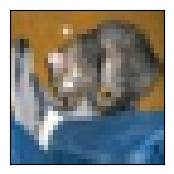

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step
예측 :Ship/ 정답 :Ship


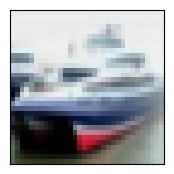

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step
예측 :Airplane/ 정답 :Ship


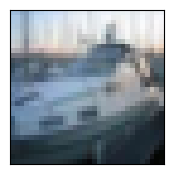

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step
예측 :Airplane/ 정답 :Airplane


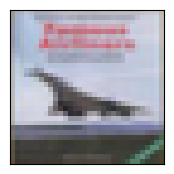

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step
예측 :Frog/ 정답 :Frog


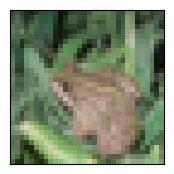

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step
예측 :Frog/ 정답 :Frog


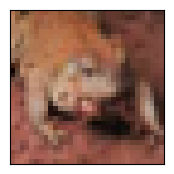

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step
예측 :Truck/ 정답 :Car


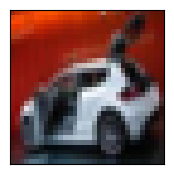

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step
예측 :Frog/ 정답 :Frog


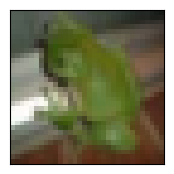

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step
예측 :Cat/ 정답 :Cat


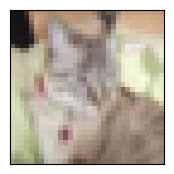

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step
예측 :Car/ 정답 :Car


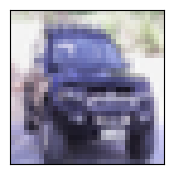

In [51]:
width = 32
height = 32
channel = 3

label_names = ['Airplane','Car','Bird','Cat','Deer','Dog','Frog','Horse','Ship','Truck']

for i in range(10):
    plt.figure(figsize=(2,2))

    output = model.predict(x_test[i].reshape(1, width, height, channel))

    plt.xticks([])
    plt.yticks([])
    plt.imshow(x_test[i].reshape(width, height, channel))

    print("예측 :"+ label_names[np.argmax(output)] + '/ 정답 :' + label_names[np.argmax(t_test[i])])
    plt.show()

In [53]:
loss, accuracy = model.evaluate(x_test, t_test, verbose=1)
print('test loss : ', round(loss, 6))
print('test accuracy :', round(accuracy*100, 3), '%')

313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.7423 - loss: 0.9390
test loss :  0.963867
test accuracy : 73.61 %


In [55]:
from tensorflow.keras.datasets import fashion_mnist

In [58]:
(x_train_fashion, t_train_fashion), (x_test_fashion, t_test_fashion) = fashion_mnist.load_data()

print('x_train_fashion :', np.shape(x_train_fashion))
print('t_train_fashion :', np.shape(t_train_fashion))
print('x_test_fashion :', np.shape(x_test_fashion))
print('t_test_fashion :', np.shape(t_test_fashion))

x_train_fashion : (60000, 28, 28)
t_train_fashion : (60000,)
x_test_fashion : (10000, 28, 28)
t_test_fashion : (10000,)


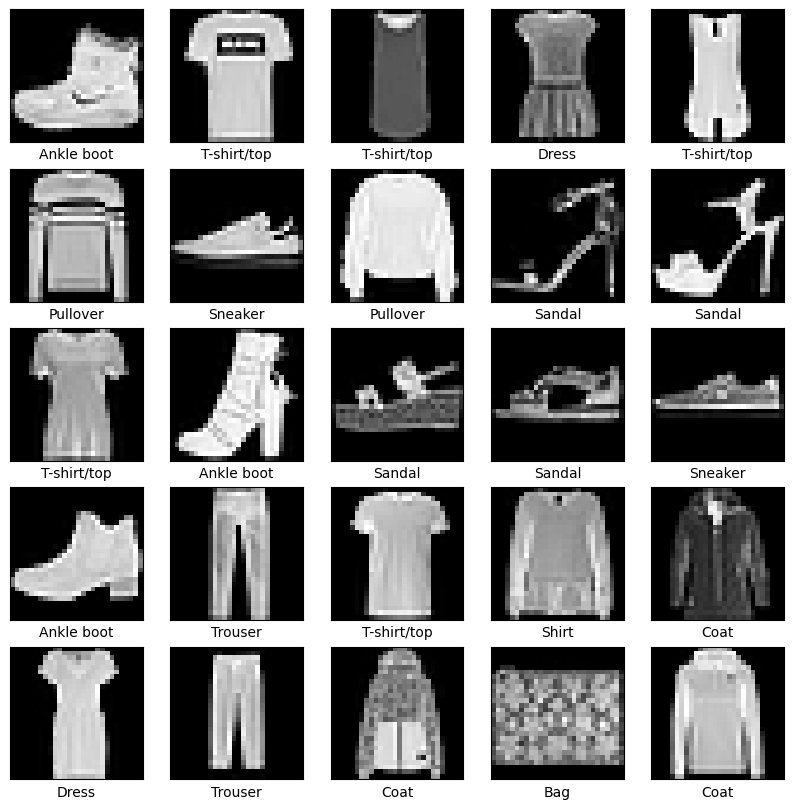

In [60]:
label_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

plt.figure(figsize=(10,10))

for i in range(25):
    plt.subplot(5, 5, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(x_train_fashion[i], cmap='gray')
    plt.xlabel(label_names[t_train_fashion[i]])
plt.show()

In [62]:
x_train_fashion = x_train_fashion.astype('float32') / 255.0
x_test_fashion = x_test_fashion.astype('float32') / 255.0

t_train_fashion = to_categorical(t_train_fashion)
t_test_fashion = to_categorical(t_test_fashion)

print('One-hot Vector 정류 후 t_train shape :', t_train_fashion.shape)
print('One-hot Vector 정류 후 t_test shape :', t_test_fashion.shape)

One-hot Vector 정류 후 t_train shape : (60000, 10)
One-hot Vector 정류 후 t_test shape : (10000, 10)


In [64]:
width = 28
height = 28
channel = 1

model = Sequential(name='Fashion_MNIST_CNN')

model.add(Conv2D(filters=32, kernel_size=(3, 3), padding='same', activation='relu',
                 input_shape=(width, height, channel)))

model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(filters=64, kernel_size=(3, 3), padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(filters=128, kernel_size=(3, 3), padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())

model.add(Dense(10, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer=Adam(learning_rate=0.001), metrics=['accuracy'])
model.summary()

Model: "Fashion_MNIST_CNN"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_3 (Conv2D)                    │ (None, 28, 28, 32)          │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 14, 14, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 14, 14, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (None, 7, 7, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 7, 7, 128)           │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_5 (MaxPooling2D)       │ (None, 3, 3, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_2 (Flatten)                  │ (None, 1152)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 10)                  │          11,530 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 104,202 (407.04 KB)

 Trainable params: 104,202 (407.04 KB)

 Non-trainable params: 0 (0.00 B)

In [66]:
model.fit(x_test_fashion, t_test_fashion, epochs=10, batch_size=16)

Epoch 1/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 8s 10ms/step - accuracy: 0.6541 - loss: 0.9769
Epoch 2/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 6s 9ms/step - accuracy: 0.8366 - loss: 0.4507
Epoch 3/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 11s 10ms/step - accuracy: 0.8663 - loss: 0.3720
Epoch 4/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 6s 10ms/step - accuracy: 0.8905 - loss: 0.3098
Epoch 5/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 6s 10ms/step - accuracy: 0.9025 - loss: 0.2673
Epoch 6/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 6s 10ms/step - accuracy: 0.9118 - loss: 0.2411
Epoch 7/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 6s 9ms/step - accuracy: 0.9207 - loss: 0.2130
Epoch 8/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 5s 9ms/step - accuracy: 0.9326 - loss: 0.1806
Epoch 9/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 6s 9ms/step - accuracy: 0.9439 - loss: 0.1550
Epoch 10/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 6s 10ms/step - accuracy: 0.9538 - loss: 0.1257


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 198ms/step
예측 : Coat / 정답 : Coat


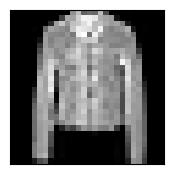

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step
예측 : Sandal / 정답 : Sandal


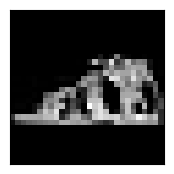

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step
예측 : Sneaker / 정답 : Sneaker


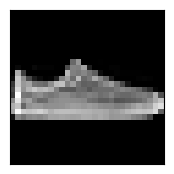

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step
예측 : Dress / 정답 : Dress


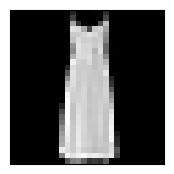

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step
예측 : Coat / 정답 : Coat


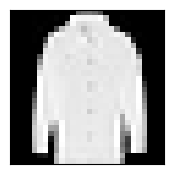

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step
예측 : Trouser / 정답 : Trouser


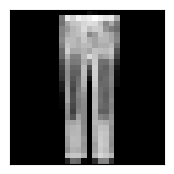

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step
예측 : Pullover / 정답 : Pullover


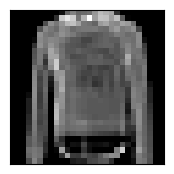

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step
예측 : Coat / 정답 : Coat


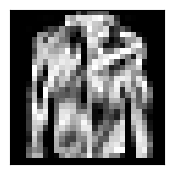

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step
예측 : Bag / 정답 : Bag


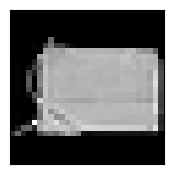

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step
예측 : T-shirt/top / 정답 : T-shirt/top


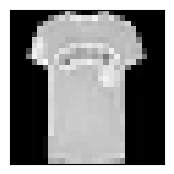

In [68]:
width = 28
height = 28
channel = 1

fashion_label_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

for i in range(10, 20):
    plt.figure(figsize=(2,2))

    output = model.predict(x_test_fashion[i].reshape(1, width, height, channel))

    plt.xticks([])
    plt.yticks([])
    plt.imshow(x_test_fashion[i].reshape(width, height, channel), cmap='gray')

    print('예측 : ' + fashion_label_names[np.argmax(output)] + ' / 정답 : ' + fashion_label_names[np.argmax(t_test_fashion[i])])
    plt.show()

In [70]:
loss, accuracy = model.evaluate(x_test_fashion, t_test_fashion, verbose=1)

print('test loss :', round(loss, 6))
print('test accuracy :', round(accuracy*100, 3), '%')

313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.9717 - loss: 0.0906
test loss : 0.08973
test accuracy : 97.05 %
